In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def kepler_NR(M, e, tol=1e-9):
    """
    Solve Kepler's equation using the Newton-Raphson method.

    Parameters:
    M   : Mean anomaly (in radians)
    e   : Eccentricity
    tol : Tolerance for convergence

    Returns:
    E : Eccentric anomaly (in radians)
    """
    # Initial guess: E = M
    E = M
    delta_E = 1  # Initial difference, large enough to enter the loop

    # Iterate until convergence
    while abs(delta_E) > tol:
        # Compute the function value and its derivative
        f_E = E - e * np.sin(E) - M
        f_prime_E = 1 - e * np.cos(E)
        
        # Update using Newton-Raphson method
        delta_E = -f_E / f_prime_E
        E = E + delta_E

    return E

In [3]:
mgrid = np.linspace(0,2*np.pi,1000)
egrid = np.linspace(0,1- 1e-6,1000)

In [4]:
tot=np.zeros((len(mgrid),len(egrid)))
for i in tqdm(range(len(mgrid))):
    for j in range(len(egrid)):
        tot[i,j]=kepler_NR(mgrid[i],egrid[j])

100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 208.27it/s]


Text(0, 0.5, 'Mean Anomaly (M)')

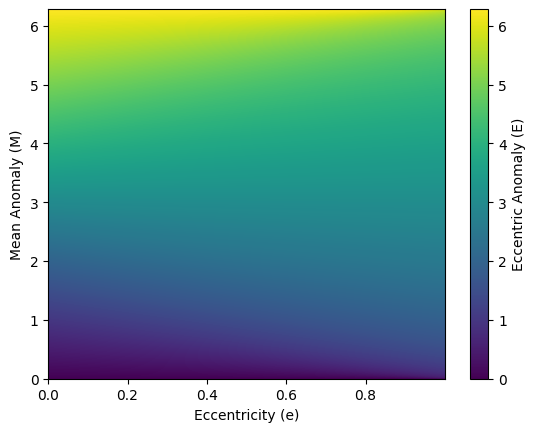

In [5]:

# Plot with imshow
plt.imshow(tot, aspect='auto', extent=[egrid.min(), egrid.max(), mgrid.min(), mgrid.max()], origin='lower')

# Add color bar
plt.colorbar(label='Eccentric Anomaly (E)')

# Add axis labels
plt.xlabel('Eccentricity (e)')
plt.ylabel('Mean Anomaly (M)')


In [6]:
from scipy.interpolate import RegularGridInterpolator
interpolator = RegularGridInterpolator((mgrid, egrid), tot,method='linear')

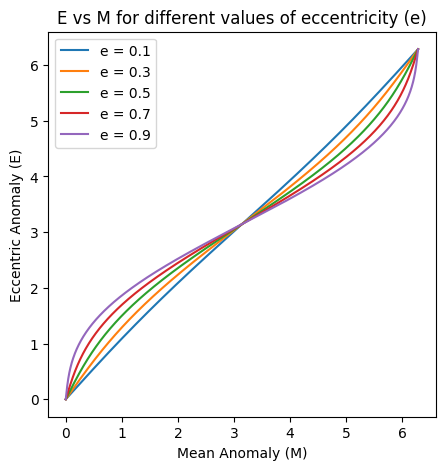

In [7]:
eccentricities = [0.1, 0.3, 0.5, 0.7, 0.9]
M_values = mgrid  # Assuming mgrid represents the range of mean anomalies

plt.figure(figsize=(5,5))
for e in eccentricities:
    points = np.array([[M, e] for M in M_values])
    E_values = interpolator(points)
    plt.plot(M_values, E_values, label=f'e = {e}')

# Add labels and legend
plt.xlabel('Mean Anomaly (M)')
plt.ylabel('Eccentric Anomaly (E)')
plt.title('E vs M for different values of eccentricity (e)')
plt.legend()


In [8]:
np.save('kep_interp.npy',np.vstack((mgrid,egrid,tot)))